In [7]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.optimizers import Adam

In [8]:
# Plots Loss and accuracy of the train versus the validation data
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

# Load the data from local


In [10]:
data_dir = 'data for model Nail'

In [16]:
import os
from PIL import Image
import numpy as np

# Define the categories
categories = ['normal', 'beau_s line', 'black line', 'clubbing', 'mees_ line', 'onycholysis', 'terry_s nail', 'white spot']

X = []
y = []

# Load the images
for category in categories:
    category_path = os.path.join(data_dir, category)
    
    # Debugging statement to check the base path
    print(f"Base directory: {data_dir}")
    
    # Debugging statement to check each category path
    print(f"Category path: {category_path}")
    
    # Check if the directory exists
    if not os.path.exists(category_path):
        print(f"Directory {category_path} does not exist.")
        continue

    for filename in os.listdir(category_path):
        img_path = os.path.join(category_path, filename)
        
        # Debugging statement to check each file path
        print(f"Processing file: {img_path}")
        
        try:
            img = Image.open(img_path).convert('RGB')
            img_resized = img.resize((256, 256))
            X.append(np.array(img_resized))
            y.append(categories.index(category))
        except Exception as e:
            print(f"Failed to process image {img_path}: {e}")

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Verify the shapes of the arrays
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Base directory: /path/to/your/data/directory
Category path: /path/to/your/data/directory/normal
Directory /path/to/your/data/directory/normal does not exist.
Base directory: /path/to/your/data/directory
Category path: /path/to/your/data/directory/beau_s line
Directory /path/to/your/data/directory/beau_s line does not exist.
Base directory: /path/to/your/data/directory
Category path: /path/to/your/data/directory/black line
Directory /path/to/your/data/directory/black line does not exist.
Base directory: /path/to/your/data/directory
Category path: /path/to/your/data/directory/clubbing
Directory /path/to/your/data/directory/clubbing does not exist.
Base directory: /path/to/your/data/directory
Category path: /path/to/your/data/directory/mees_ line
Directory /path/to/your/data/directory/mees_ line does not exist.
Base directory: /path/to/your/data/directory
Category path: /path/to/your/data/directory/onycholysis
Directory /path/to/your/data/directory/onycholysis does not exist.
Base directo

# Load the data for jupyter notebook

In [ ]:
# Load all the images from the "Nail" folder in your "raw_data" folder

categories = ['normal', 'beau_s line', 'black line', 'clubbing', 'mees_ line', 'onycholysis', 'terry_s nail', 'white spot']

X = []
y = []

# Load the images
for category in categories:
    path = os.path.join(os.path.expanduser('~'), "code", "ariannamng",
                                   "predicting_nail_diseases", 'data for model Nail', category)

    for f in os.listdir(path):
            img = Image.open(os.path.join(path, f))
            foo = img.resize((256,256))
            X.append(np.array(foo))
            y.append(categories.index(category))


# Preprocessing

In [ ]:
# Shuffel the data

c = list(zip(X, y))
np.random.shuffle(c)
X, y = zip(*c)
X = np.array(X)
y = np.array(y)

In [ ]:
num_classes = 8
y = to_categorical(y, num_classes= num_classes)

In [ ]:
# split data in test, val, train and preprocess data
ratio_train = 0.6
ratio_val = 0.2
len_train = int(X.shape[0]*ratio_train)
len_val = int(X.shape[0]*ratio_val)

X_train_processed = X[:len_train]/ 255. - 0.5
X_val_processed = X[len_train:(len_train+len_val)]/ 255. - 0.5
X_test_processed = X[(len_train+len_val):X.shape[0]]/ 255. - 0.5

y_train = y[:len_train]
y_val = y[len_train:(len_train+len_val)]
y_test = y[(len_train+len_val):X.shape[0]]

# TRANSFER LEARNING

In [ ]:
# Compile the model as a binary classification model

def compile_model(model):
    '''return a compiled model for the baseline'''
    adam = Adam(learning_rate = 0.0001)

    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    return model

In [ ]:
# Initialize and compile a model for a transfer learning

def build_model(base_model):
    '''instanciate and return the CNN architecture'''
    base_model.trainable = False
    flattening_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    drop_out = layers.Dropout(0.6)
    prediction_layer = layers.Dense(8, activation='softmax')

    model = Sequential([
      base_model,
      flattening_layer,
      dense_layer,
      drop_out,
      prediction_layer
      ])
    return compile_model(model)

# Data augmentation

In [ ]:
# Add Data Augmentation if your model is overfitting
aug = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest")


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
aug.fit(X_train_processed)

train_flow = aug.flow(X_train_processed, y_train, batch_size=16)
val_flow = aug.flow(X_val_processed, y_val, batch_size=16)

# VGG16 model

In [ ]:
# Loads the VGG16 model
def load_VGG16_model():
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train_processed.shape[1:4])
    return model

In [ ]:
# Fit the VGG16 model on the train data
es = EarlyStopping(patience = 10)
VGG16_model = build_model(load_VGG16_model())

history_VGG16 = VGG16_model.fit(
  train_flow,
  validation_data = val_flow,
  epochs = 100,
  batch_size = 32,
  verbose = 0,
  callbacks = [es]
)

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

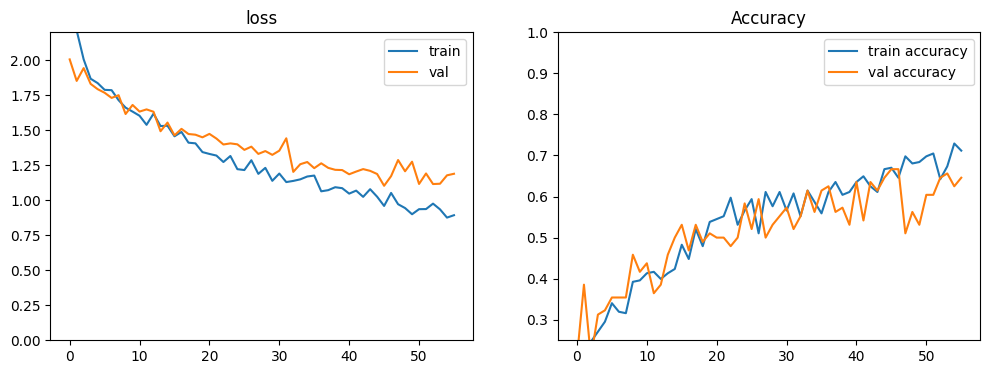

In [ ]:
# Plot Loss and accuracy of the VGG16 model
plot_history(history_VGG16, title='VGG16', axs=None, exp_name="")

In [ ]:
# Evaluate the VGG16 model using the test data
VGG16_model.evaluate(X_test_processed, y_test, verbose=0)

[1.1535221338272095, 0.625]

# ResNet50

In [ ]:
# Loads the ResNet50 model
def load_ResNet50_model():
    model = ResNet50(weights="imagenet", include_top=False, input_shape=X_train_processed.shape[1:4])
    return model

In [ ]:
# Fit the ResNet50 model on the train data
es = EarlyStopping(patience = 10)
ResNet50_model = build_model(load_ResNet50_model())

history_ResNet50 = ResNet50_model.fit(
  X_train_processed,
  y_train,
  validation_split = 0.2,
  epochs = 500,
  batch_size = 32,
  verbose = 0,
  callbacks = [es]
)

94765736/94765736 [==============================] - 3s 0us/step


(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

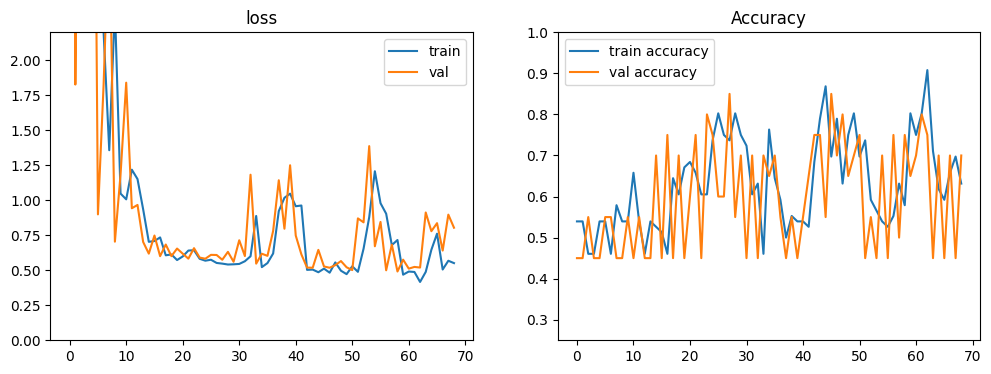

In [ ]:
# Plot Loss and accuracy of the ResNet50 model
plot_history(history_ResNet50, title='ResNet50', axs=None, exp_name="")

In [ ]:
# Evaluate the ResNet50 model using the test data
ResNet50_model.evaluate(X_test_processed, y_test, verbose=0)

[0.7244213223457336, 0.5833333134651184]

# EfficientNetB0

In [ ]:
# Loads the EfficientNetB0 model
def load_EfficientNetB0_model():
    model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=X_train_processed.shape[1:4])
    return model

In [ ]:
# Fit the EfficientNetB0 model on the train data
es = EarlyStopping(patience = 10)
EfficientNetB0_model = build_model(load_EfficientNetB0_model())

history_EfficientNetB0 = EfficientNetB0_model.fit(
  X_train_processed,
  y_train,
  validation_split = 0.2,
  epochs = 500,
  batch_size = 32,
  verbose = 1,
  callbacks = [es]
)

In [ ]:
# Plot Loss and accuracy of the EfficientNetB0 model
plot_history(history_EfficientNetB0, title='EfficientNetB0', axs=None, exp_name="")

In [ ]:
# Evaluate the EfficientNetB0 model using the test data
EfficientNetB0_model.evaluate(X_test_processed, y_test, verbose=0)